In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Algoritmia
Top K elementos frecuentes:

Dada una matriz de números enteros y un número entero k, devuelve los k elementos más frecuentes. Puede devolver la respuesta en cualquier orden.

- Ejemplo 1:
Entrada: números = [1,1,1,2,2,3], k = 2
Salida: [1,2]

- Ejemplo 2:
Entrada: números = [1], k = 1
Salida: [1]







In [22]:
from typing import List

def topKFrequent(nums: List[int], k: int):
  count = {}
  freq = [[] for i in range(len(nums) + 1)]

  for n in nums:
      count[n] = 1 + count.get(n, 0)
  for n, c in count.items():
      freq[c].append(n)

  res = []
  for i in range(len(freq) - 1, 0, -1):
      for n in freq[i]:
          res.append(n)
          if len(res) == k:
              return res

In [24]:
nums = [1,1,1,2,2,3]
k = 1
topKFrequent(nums,k)

[1]

# 2. Datasets: Lectura, y eda simple
De los siguientes dataset, se deben cargar en el notebook de python, determinar la cantidad de filas, cantidad de columnas, nombre y tipo de columnas, información estadística básica (describe), faltantes y outliers.

- bitcoin_price_dataset_2015_2023.csv
- mLabel_tweets.tsv
- Clean_Top_1000_Youtube_df - youtubers_df.txt
- Dry_Bean_Dataset.xlsx

## Dataset "bitcoin_price_dataset_2015_2023.csv"

In [ ]:
bitcoin = pd.read_csv('bitcoin_price_dataset_2015_2023.csv')
bitcoin.head()


,Date,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
0,2023-09-06,25772.601563,25845.994141,25708.595703,25721.945313,25721.945313,10252755968
1,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
4,2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473


In [ ]:
print('Cantidad de filas : '+str(bitcoin.shape[0]))
print('Cantidad de columnas : '+str(bitcoin.shape[1]))

Cantidad de filas : 3171
Cantidad de columnas : 7


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          3171 non-null   object 
 1   Open Price (USD)              3171 non-null   float64
 2   High Price (USD)              3171 non-null   float64
 3   Low Price (USD)               3171 non-null   float64
 4   Closing Price (USD)           3171 non-null   float64
 5   Adjusted Closing Price (USD)  3171 non-null   float64
 6   Trading Volume                3171 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.5+ KB


In [ ]:
bitcoin.describe()

,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3.171000e+03
mean,14332.172768,14674.383308,13956.292591,14338.795762,14338.795762,1.706397e+10
std,16065.029720,16460.429204,15612.281509,16061.184736,16061.184736,1.944117e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1068.204956,1110.829956,1043.929993,1075.885010,1075.885010,2.564590e+08
50%,8221.580078,8371.150391,8005.310059,8222.078125,8222.078125,1.217532e+10
75%,22287.365235,22661.470703,21625.421875,22358.014649,22358.014649,2.787545e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
bitcoin.isnull().sum()

Date                            0
Open Price (USD)                0
High Price (USD)                0
Low Price (USD)                 0
Closing Price (USD)             0
Adjusted Closing Price (USD)    0
Trading Volume                  0
dtype: int64

No tenemos datos faltantes

In [ ]:
bitcoin['Date'].describe()

count           3171
unique          3171
top       2023-09-06
freq               1
Name: Date, dtype: object

In [ ]:
print(bitcoin['Date'].min())
print(bitcoin['Date'].max())


2015-01-01
2023-09-06


Text(0.5, 0, '')

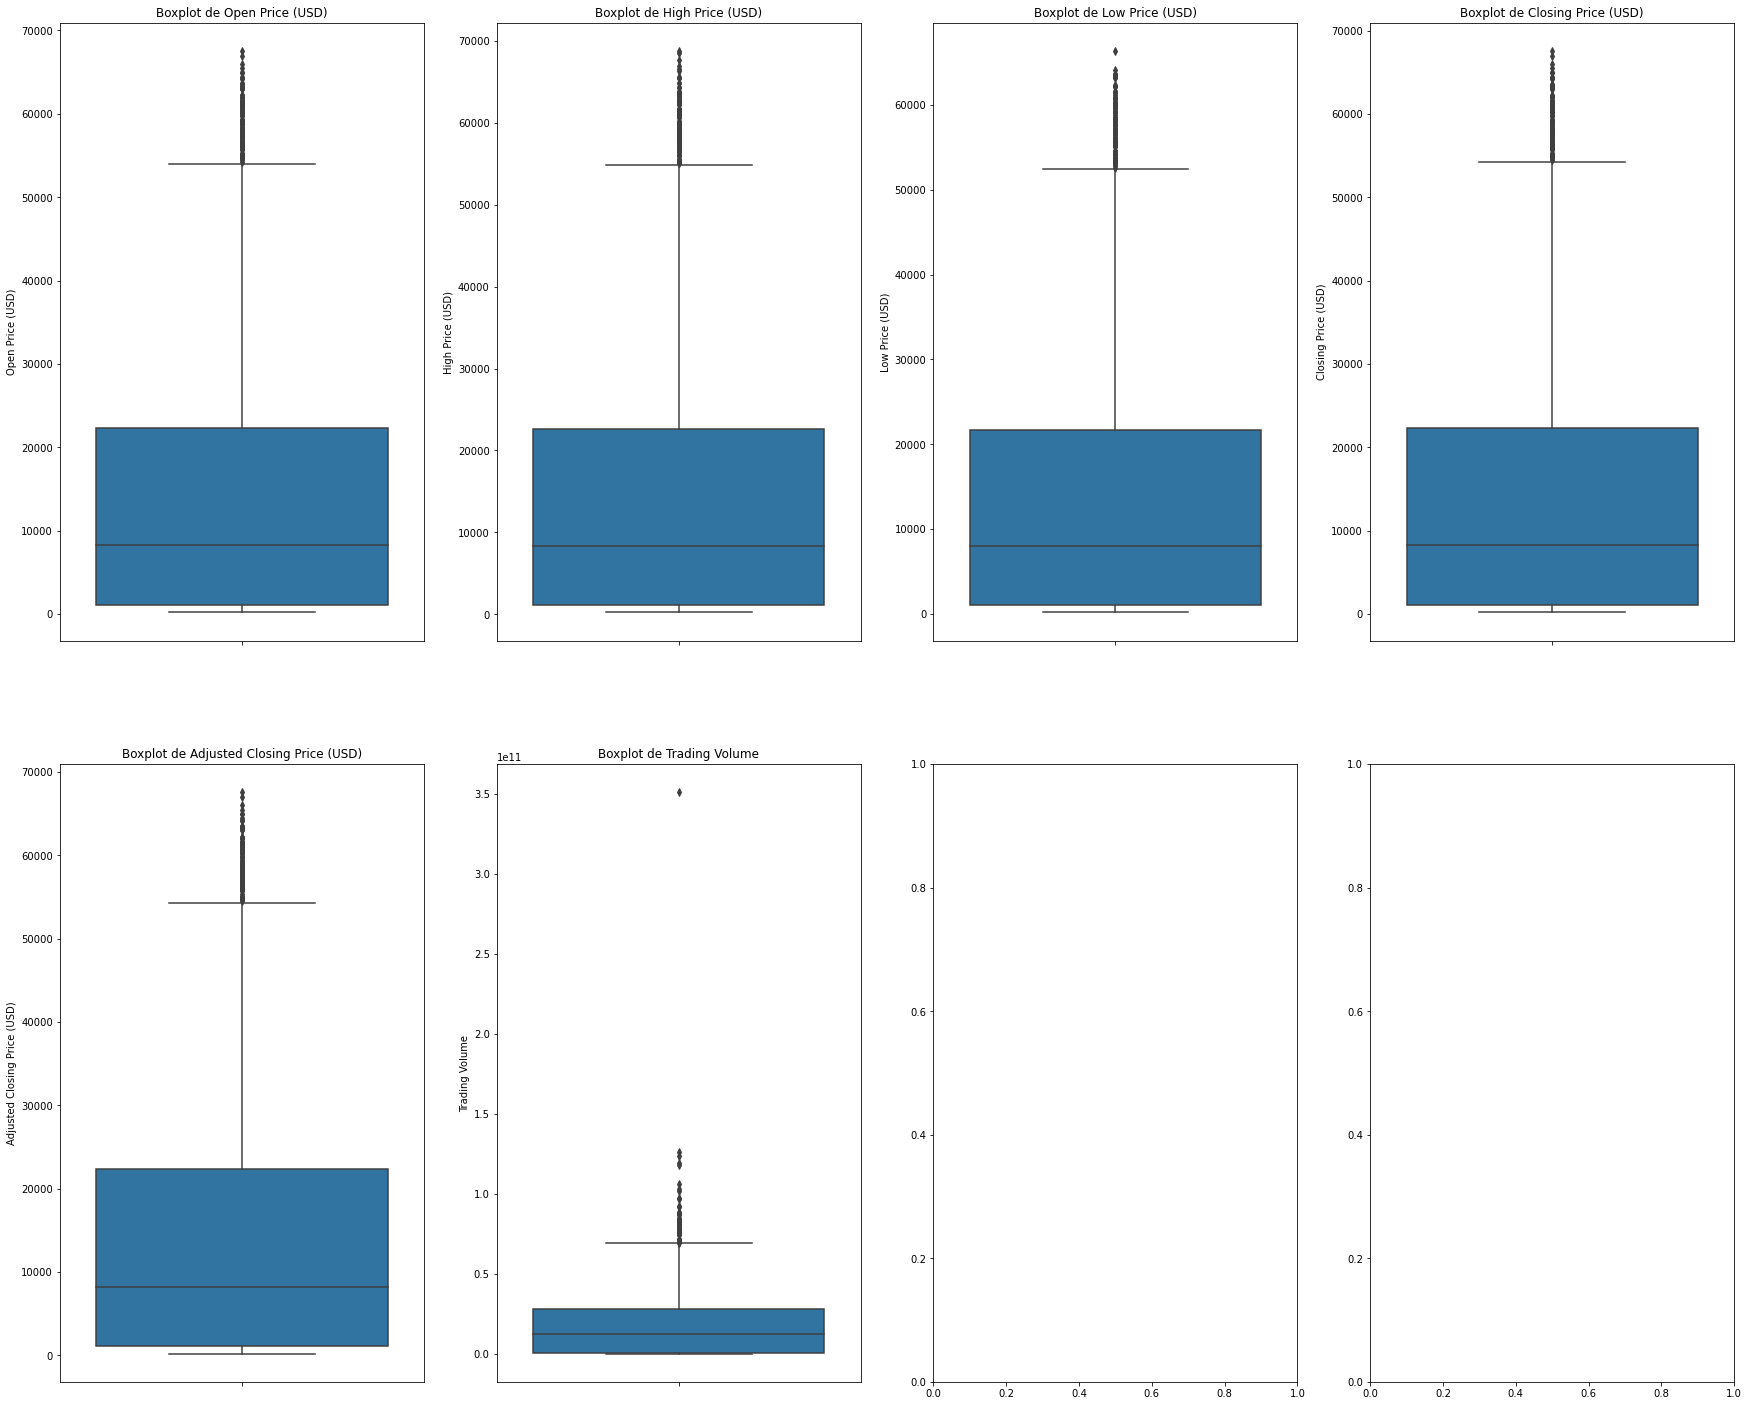

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(30, 25))

sns.boxplot(y='Open Price (USD)',data=bitcoin, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de Open Price (USD)')
axes[0, 0].set_xlabel('')
sns.boxplot(y='High Price (USD)',data=bitcoin, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de High Price (USD)')
axes[0, 1].set_xlabel('')
sns.boxplot(y='Low Price (USD)',data=bitcoin, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot de Low Price (USD)')
axes[0, 2].set_xlabel('')
sns.boxplot(y='Closing Price (USD)',data=bitcoin, ax=axes[0, 3])
axes[0, 3].set_title('Boxplot de Closing Price (USD)')
axes[0, 3].set_xlabel('')
sns.boxplot(y='Adjusted Closing Price (USD)',data=bitcoin, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Adjusted Closing Price (USD)')
axes[1, 0].set_xlabel('')
sns.boxplot(y='Trading Volume',data=bitcoin, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Trading Volume')
axes[1, 1].set_xlabel('')


## Dataset mLabel_tweets.tsv

In [20]:
tweets = pd.read_csv('mLabel_tweets.tsv', sep='\t', encoding='ISO-8859-1')
tweets.head()


,ID,tweet,labels,Unnamed: 3,Unnamed: 4
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,NaN,NaN
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,NaN,NaN
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,NaN,NaN
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,NaN,NaN
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,NaN,NaN


In [21]:
print('Cantidad de filas : '+str(tweets.shape[0]))
print('Cantidad de columnas : '+str(tweets.shape[1]))

Cantidad de filas : 9920
Cantidad de columnas : 5


In [22]:
tweets.describe()

,ID,tweet,labels,Unnamed: 3,Unnamed: 4
count,9920,9920,9778,1,1
unique,9920,9920,287,1,1
top,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,side-effect,A COVID-19 vaccine isnât necessary,Go back to living a normal life. Says a world...
freq,1,1,2844,1,1


In [23]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          9920 non-null   object
 1   tweet       9920 non-null   object
 2   labels      9778 non-null   object
 3   Unnamed: 3  1 non-null      object
 4   Unnamed: 4  1 non-null      object
dtypes: object(5)
memory usage: 387.6+ KB


In [24]:
tweets.isnull().sum()

ID               0
tweet            0
labels         142
Unnamed: 3    9919
Unnamed: 4    9919
dtype: int64

las columnas "Unnamed: 3" y "Unnamed: 4" estan nulas se pueden eliminar

In [25]:
tweets[tweets['labels'].isnull()]

,ID,tweet,labels,Unnamed: 3,Unnamed: 4
94,1403329758692216835t,"@ANI National Vaccine ""Covaxin"" with no phase ...",NaN,NaN,NaN
102,1305675565131862017t,"@JohnCornyn Plus, Covid-19 is akin to the comm...",NaN,NaN,NaN
115,1337274537583337479t,"Rushed through, Side effects, complications et...",NaN,NaN,NaN
135,1187497499709231104t,@JamesrossrJames Nah ... I've gotten 2 flu-shots,NaN,NaN,NaN
233,1164665474505777152t,@MsSmartyPanda I have no idea what the rest of...,NaN,NaN,NaN
...,...,...,...,...,...
9714,1300532781101977603t,Are they really just trying to kill more Ameri...,NaN,NaN,NaN
9771,1428917550209855489t,#VAERS #Pediatrics â£ï¸â°ï¸ 13yâï¸#Mode...,NaN,NaN,NaN
9832,1286318140859842562t,@RobHerring @realDonaldTrump @OANN Why do you ...,NaN,NaN,NaN
9872,1445741022437261339t,BREAKING: SWEDEN suspends moderna vaccine for ...,NaN,NaN,NaN


In [26]:
tweets['labels'].count()

9778

In [27]:
total = round(tweets['labels'].isnull().sum()/tweets['labels'].count() * 100,2)
print(" Se tienen un total de : " + str(total) + '% de datos faltantes sin columna label')

 Se tienen un total de : 1.45% de datos faltantes sin columna label


In [28]:
tweets['cat_palabras'] = tweets['tweet'].apply(len)
tweets.head()

,ID,tweet,labels,Unnamed: 3,Unnamed: 4,cat_palabras
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients,NaN,NaN,95
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect,NaN,NaN,173
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect,NaN,NaN,255
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory,NaN,NaN,255
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed,NaN,NaN,290


In [29]:
tweets.nlargest(10,'cat_palabras')

,ID,tweet,labels,Unnamed: 3,Unnamed: 4,cat_palabras
1812,1296944092153143296t,Australiaâs current opinion of a fast tracke...,rushed mandatory,NaN,NaN,333
907,1437309456472162306t,Anyone that thinks @US_FDA gonna slamdunk the ...,side-effect,NaN,NaN,321
1555,1237171802247495680t,#twitterstorm ask @google *right now* âWho c...,side-effect pharma,NaN,NaN,319
2924,1419889746994556931t,But if youâre fully vaccinated why would tha...,ineffective,NaN,NaN,319
5857,1357354024383754242t,"Okay, I donât want to piss anyone off, but h...",conspiracy,NaN,NaN,319
9703,1302966017287688194t,ð¤£ðð ð¤£ðð ð¤£ðð ð¤£ðð...,political,NaN,NaN,319
8492,1334533552688353281t,Obama mocked after promise to take Covid-19 ð...,political ingredients,NaN,NaN,318
7870,1342211667791282176t,Itâs about the math. The self-proclaimed â...,ineffective,NaN,NaN,315
6891,1339664023030288386t,Nurses across the country are refusing to take...,unnecessary conspiracy pharma,NaN,NaN,314
7921,1376815180785442819t,âHuge privacy implicationsâ: Florida Gov. ...,political mandatory,NaN,NaN,314


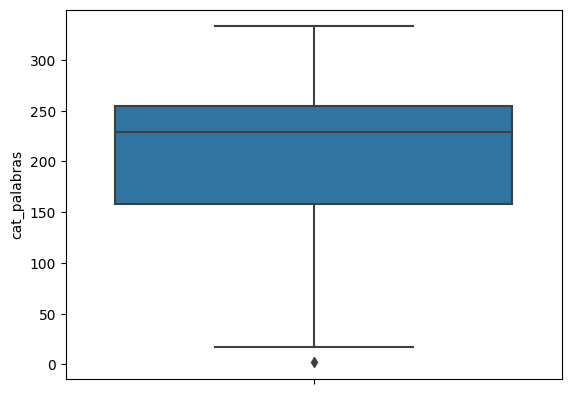

In [32]:
sns.boxplot(y='cat_palabras',data=tweets)
plt.show()

## Dataset "Clean_Top_1000_Youtube_df - youtubers_df.txt"

In [ ]:
youtube = pd.read_csv("Clean_Top_1000_Youtube_df - youtubers_df.txt",sep='\t')
youtube

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,"249,500,000",IN,"86,200","2,700",78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,"183,500,000",US,"117,400,000","5,300,000","18,500",http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,"165,500,000",US,"7,000,000","24,700",0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,"162,600,000",IN,"15,600",166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,"113,500,000",US,"3,900,000","12,400",0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Food,"11,700,000",KR,"397,400","14,000",124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Film,"11,700,000",IN,"1,100,000","92,500",164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Entertainment,"11,700,000",ID,"211,400",745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Film,"11,700,000",IN,"14,000",81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [ ]:
print('Cantidad de filas : '+str(youtube.shape[0]))
print('Cantidad de columnas : '+str(youtube.shape[1]))

Cantidad de filas : 1000
Cantidad de columnas : 9


In [ ]:
youtube.describe()

,Rank
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [ ]:
columnas_reemplazo = ['Suscribers','Visits','Likes','Comments']
youtube[columnas_reemplazo] = youtube[columnas_reemplazo].applymap(lambda s: float(s.replace(',','')))

In [ ]:
youtube.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.199870e+07,1.208789e+06,5.360307e+04,1287.732000
std,288.819436,1.686848e+07,5.230081e+06,2.580510e+05,6778.344022
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,2.942500e+04,4.400000e+02,2.000000
50%,500.500000,1.680000e+07,1.739500e+05,3.500000e+03,64.500000
75%,750.250000,2.382500e+07,8.654750e+05,2.865000e+04,470.500000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [ ]:
youtube.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

No tenemos datos faltantes

In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  1000 non-null   object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


Text(0.5, 0, '')

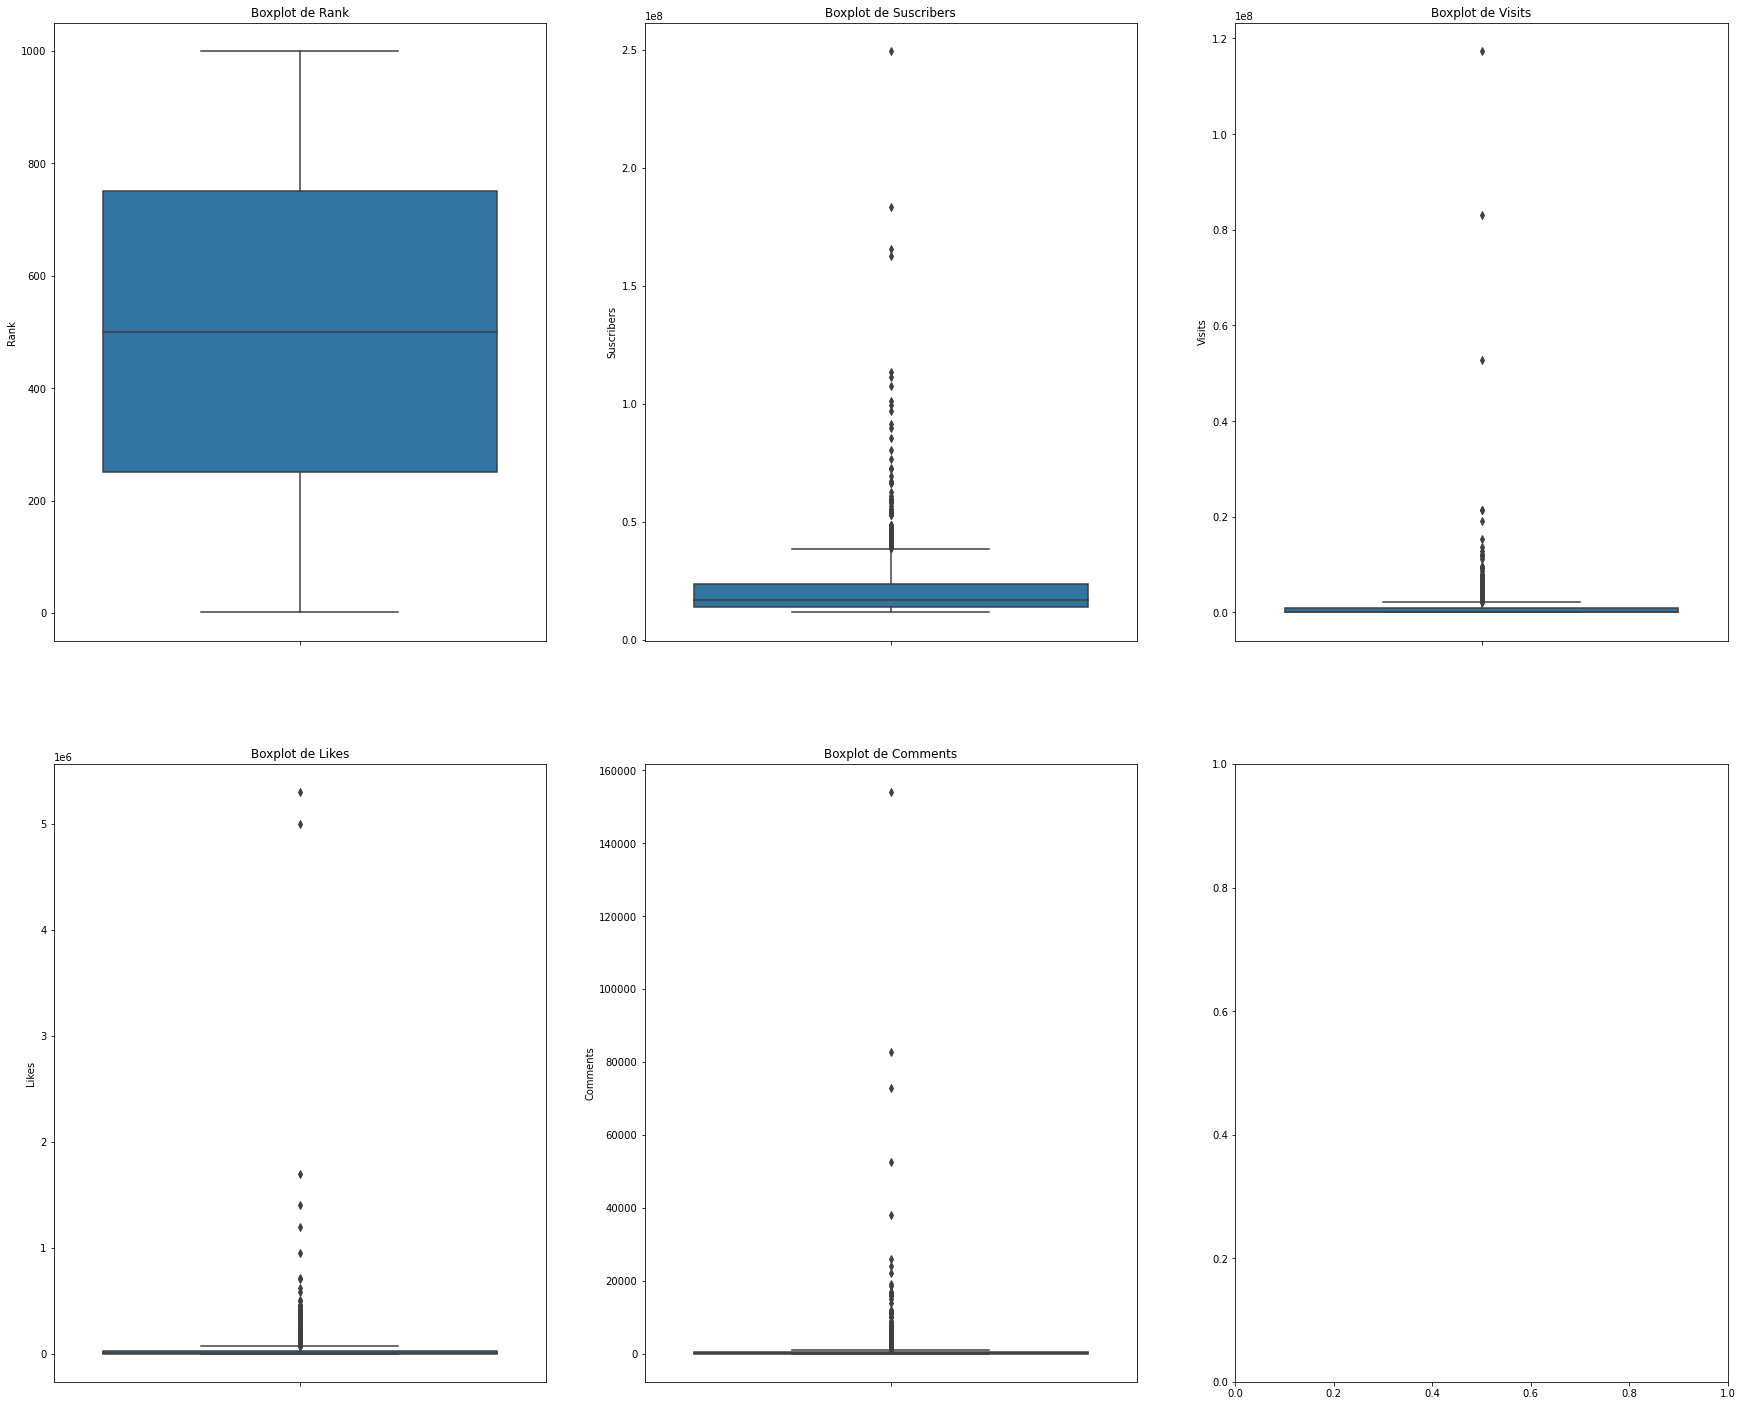

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 25))

sns.boxplot(y='Rank',data=youtube, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de Rank')
axes[0, 0].set_xlabel('')
sns.boxplot(y='Suscribers',data=youtube, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Suscribers')
axes[0, 1].set_xlabel('')
sns.boxplot(y='Visits',data=youtube, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot de Visits')
axes[0, 2].set_xlabel('')
sns.boxplot(y='Likes',data=youtube, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Likes')
axes[1, 0].set_xlabel('')
sns.boxplot(y='Comments',data=youtube, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Comments')
axes[1, 1].set_xlabel('')



Se observa que hay outliers

## Dataset "Dry_Bean_Dataset.xlsx"

In [ ]:
bean = pd.read_excel('Dry_Bean_Dataset.xlsx')
bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
print('Cantidad de filas : '+str(bean.shape[0]))
print('Cantidad de columnas : '+str(bean.shape[1]))

Cantidad de filas : 13611
Cantidad de columnas : 17


In [ ]:
bean.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
bean.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

No tenemos datos faltantes

In [ ]:
bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
cols = bean.select_dtypes(include=['number']).columns

filas = len(cols)
columnas = 1

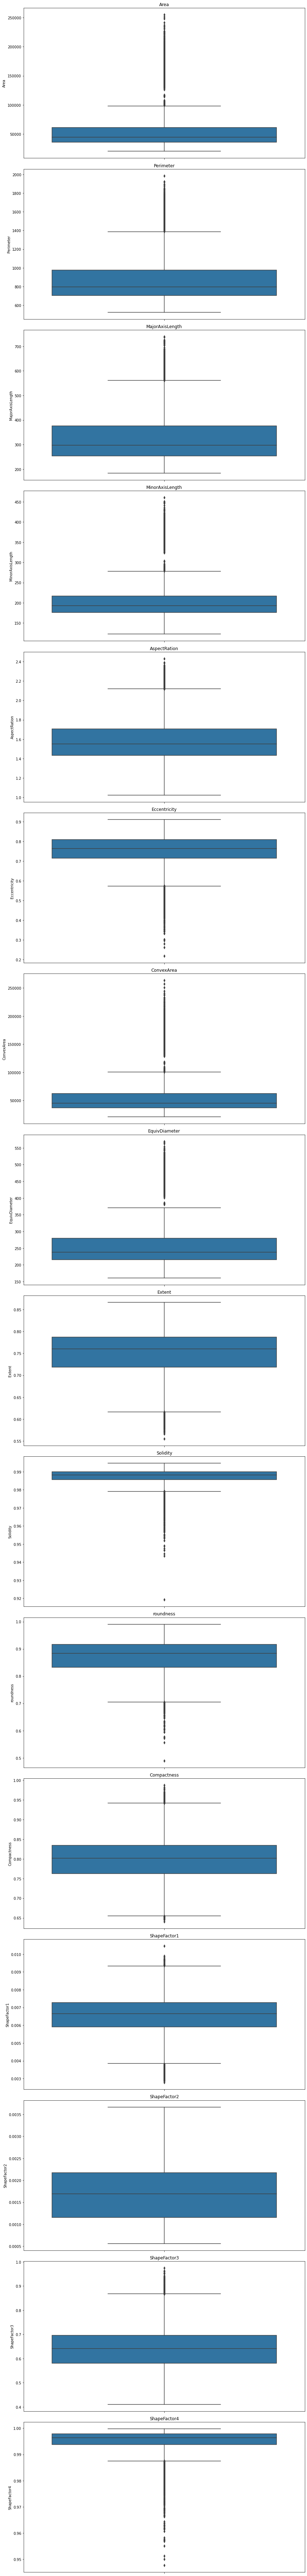

In [ ]:
fig, axes = plt.subplots(filas, columnas, figsize=(12, 100))

for i, columna in enumerate(cols):
    sns.boxplot(y=bean[columna], ax=axes[i])
    axes[i].set_title(columna)

plt.tight_layout()
plt.show()

# 3. Tamaño de clase de Universidad
- Dataset: tamaño_de_clase.csv

Imaginemos una universidad donde la oficina del Decano publica datos que indican que el tamaño promedio de las clases es de 25 estudiantes. Sin embargo, al hablar con los estudiantes, muchos de ellos afirman que el tamaño promedio de las clases que han experimentado es más cercano a 28 estudiantes.


Calcule en python y explique:
1. Calcule en python el promedio desde todos los puntos de vista posibles
2. ¿Quién está sesgado en su cálculo del tamaño promedio de la clase, el Decano o el Estudiante?
3. Proporcione una solucion al sesgo.

In [ ]:
df = pd.read_csv('tamaño_de_clase.csv',index_col=0)
df.head()

,Class_ID,Class_Size,Number_of_Students_Surveyed
0,1,20,1
1,2,22,1
2,3,23,1
3,4,24,1
4,5,25,1


In [ ]:
#Cálculo del promedio ponderado desde la perspectiva del estudiante:

weighted_avg = (df['Class_Size'] * df['Number_of_Students_Surveyed']).sum() / df['Number_of_Students_Surveyed'].sum()
weighted_avg

28.47741935483871

In [ ]:
#Cálculo del promedio simple desde la perspectiva del Decano:

simple_avg = df['Class_Size'].mean()
simple_avg

25.4

In [ ]:
#Aplicación del filtro inverso para corregir el sesgo:

corrected_avg = (weighted_avg + simple_avg) / 2
corrected_avg


26.938709677419354

El cálculo del estudiante está sesgado debido al muestreo sesgado por longitud, ya que las clases más grandes tienen más peso en su promedio.
Ambos tienen razón en sus respectivos contextos. El Decano está promediando sobre clases, mientras que el estudiante está promediando sobre asientos en clases.


# 4. Prematuros
- Dataset: embarazo.csv

Cuando se espera un hijo, en EEUU es común escuchar que los primeros hijos suelen nacer tarde, pero también se escucha lo contrario, que tienden a nacer temprano.

Este examen busca resolver este debate utilizando un conjunto de datos del National Survey of Family Growth, administrado por el CDC.
      

In [2]:
df = pd.read_csv('embarazo.csv',index_col=0)
df.head()

,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date
0,0,True,Zimbawe,2022-01-01,2022-07-03,2021-10-16
1,1,False,Zimbawe,2022-01-02,2022-09-18,2021-07-04
2,2,False,USA,2022-01-03,2022-09-16,2021-06-14
3,3,True,USA,2022-01-04,2022-09-23,2021-08-24
4,4,False,USA,2022-01-05,2022-09-24,2021-06-02


Cuando se espera un hijo, en EEUU es común escuchar que los primeros hijos suelen nacer tarde, pero también se escucha lo contrario, que tienden a nacer temprano.

Este examen busca resolver este debate utilizando un conjunto de datos del National Survey of Family Growth, administrado por el CDC.

# consignas

1. Creación de Variables para el Análisis: Utiliza el conjunto de datos para crear una columna que represente la duración real del embarazo en semanas.

2. ¿Cual idea es la correcta? madres primerizas tienen el hijo mas tarde o por el contrario?

3. ¿Hay una diferencia estadísticamente significativa en la duración promedio de los embarazos entre madres primerizas y madres con más hijos?
    * Realiza una prueba t de dos muestras para comparar las medias. El test a continuacion. Para ejecutarlo hay que aislar la variable estudiada segun los dos grupos
 ```
from scipy.stats import ttest_ind

group1 = #madres primerizas
group2 = #madres no primerizas

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de semanas entre madres primerizas y no primerizas.")
else:
    print("No rechazar la hipótesis nula.")
```
       
* Visualiza distribuciones. Se llega a la misma conclusion ¿Por qué?

4. Calcular la media y la mediana de la duración del embarazo.
      
### Exploración del Proceso "Sin Memoria"


Exploración del Proceso "Sin Memoria"

El fenómeno de "sin memoria" en la duración de los embarazos se refiere a que el tiempo restante estimado para el parto no depende del tiempo que ya ha pasado. Este fenómeno es característico de las distribuciones exponenciales y se observa en otros procesos estocásticos-

5. Si el tiempo estimado es la semana 37, cuantas muestras por pais superan esa semana. Cuantas estan por debajo de esa semana.

6. ¿Cual seria una buena estimación en caso de que supere la semana 37? ¿Cual seria una buena estimación en caso de que este por debajo de la semana 37?

7. Duración Promedio del Embarazo: Calcula y compara la duración promedio del embarazo para madres primerizas y madres con más hijos.



In [3]:
df['actual_birth_date'] = pd.to_datetime(df['actual_birth_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [4]:
# Crear columna para la duración real del embarazo en semanas
df['actual_duration'] = (df['actual_birth_date'] - df['due_date']).dt.days / 7

In [5]:
df.sample(5)

,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date,actual_duration
704,704,True,USA,2023-12-06,2024-08-21,2023-07-26,37.000000
890,890,True,USA,2024-06-09,2025-02-22,2024-01-21,36.857143
663,663,False,USA,2023-10-26,2024-07-09,2023-08-24,36.714286
1906,1906,True,Zimbawe,2027-03-22,2027-08-10,2026-12-21,20.142857
1066,1066,False,Zimbawe,2024-12-02,2025-08-16,2024-07-08,36.714286


In [6]:
# Filtrar el conjunto de datos para incluir solo embarazos que han llegado a la semana 37
df_37_onwards = df[df['actual_duration'] >= 37]

# Calcular el tiempo restante estimado
df_37_onwards['estimated_remaining_time'] = df_37_onwards['actual_duration'] - 37


<ipython-input-6-a3f293e1222e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_37_onwards['estimated_remaining_time'] = df_37_onwards['actual_duration'] - 37


In [7]:
df_37_onwards.sample(5)

,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date,actual_duration,estimated_remaining_time
1427,1427,False,Zimbawe,2025-11-28,2026-08-14,2025-08-15,37.000000,0.000000
1265,1265,True,USA,2025-06-19,2026-03-07,2024-12-26,37.285714,0.285714
1895,1895,False,Zimbawe,2027-03-11,2027-11-25,2026-08-20,37.000000,0.000000
1716,1716,True,USA,2026-09-13,2027-06-02,2026-03-22,37.428571,0.428571
1497,1497,False,Zimbawe,2026-02-06,2026-10-26,2025-08-29,37.428571,0.428571


In [13]:
dfgraf = df.copy()

In [14]:
df = df[df.country == 'USA']

In [15]:
avg_duration_first_child = df[df['first_child'] == True]['actual_duration'].mean()
avg_duration_not_first_child = df[df['first_child'] == False]['actual_duration'].mean()

print(f"Duración promedio del embarazo para madres primerizas: {avg_duration_first_child}")
print(f"Duración promedio del embarazo para madres con más hijos: {avg_duration_not_first_child}")


Duración promedio del embarazo para madres primerizas: 36.99823633156967
Duración promedio del embarazo para madres con más hijos: 36.99826137351492


In [16]:
from scipy.stats import ttest_ind
group1 = df[df["first_child"]==True]

group1 = group1[[ 'actual_duration']]

group2 = df[df["first_child"]==False]
group2 = group2[[ 'actual_duration']]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
  print("Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de semanas entre madres primerizas y no primerizas.")
else:
  print("No rechazar la hipótesis nula.")

No rechazar la hipótesis nula.


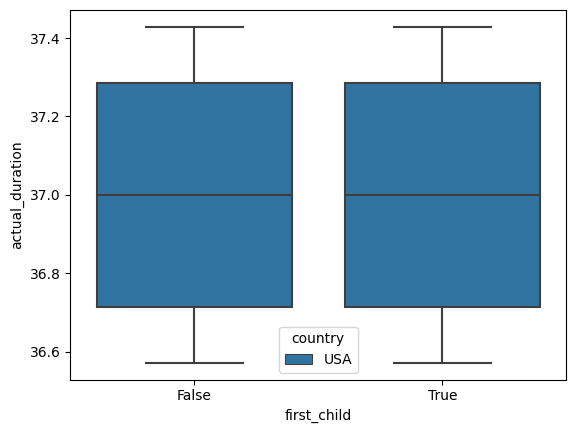

In [17]:
sns.boxplot(x='first_child', y='actual_duration', data=df, hue="country")
plt.show()


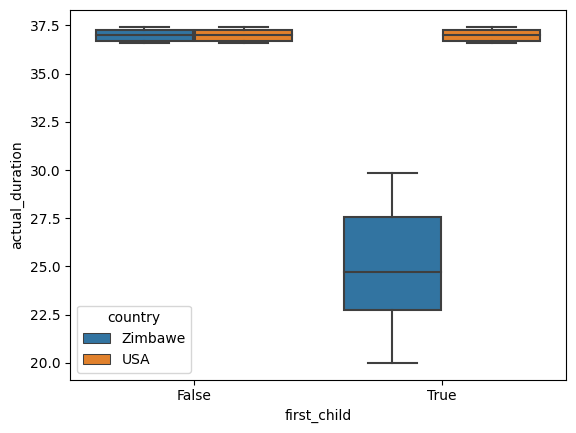

In [18]:

sns.boxplot(x='first_child', y='actual_duration', data=dfgraf, hue="country")
plt.show()

In [19]:
df['pregnancy_duration_weeks'] = (df['actual_birth_date'] - df['due_date']).dt.days // 7


df_37_onwards = df[df['pregnancy_duration_weeks'] >= 37]
mean_durations = df_37_onwards.groupby('pregnancy_duration_weeks').mean()


filtered_df = df[df['pregnancy_duration_weeks'] >= 37]
expected_remaining_time = filtered_df.groupby('pregnancy_duration_weeks')['due_date'].count()


<ipython-input-19-962f10d64c9b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_durations = df_37_onwards.groupby('pregnancy_duration_weeks').mean()


# 5. Ingeniería social:
- Dataset: isla.csv

Eres asesor de un gobernante en una isla del Caribe preocupado por el rápido crecimiento de la población. Se te ha pedido que realices un análisis de datos para entender las implicaciones de una política que limita el número de hijos que una mujer puede tener, basándose en el número de hijos que tuvo su madre.

1. Crear la funcion policy_function que es la politica del gobierno. Seria tener 1 hijo o uno menos que su madre.
2. Crear una nueva columnanum_children_next_gen  que sea resultado de aplicar esa funcion
3. Ahora implementar este codigo

 ```
# For each mother's family, replicate the row by the number of children she had
# Then, assign the number of children each child in the next generation can have
rows = []
for idx, row in df_mothers.iterrows():
    num_children = row['num_children_mother']
    num_children_next_gen = row['num_children_next_gen']
    for _ in range(num_children):
        rows.append([row['family_id'], row['mother_id'], num_children, num_children_next_gen])
```

4. Crear un dataframe que tome como data las rows del loop anterior y tenga las siguientes columnas ['family_id', 'mother_id', 'num_children_mother', 'num_children_next_gen']
5. Análisis Descriptivo: Realiza un análisis descriptivo del conjunto de datos. ¿Cuál es el tamaño promedio de la familia según las madres y según los hijos?
6. Que sucede con la poblacion inicial de la madre y de los hijos? Crece o decrece? cuanta poblacion mas o cuanta menos?
7. Fue la política exitosa?


In [26]:
df_mothers = pd.read_csv('isla.csv',index_col=0)
df_mothers.head()

,family_id,mother_id,num_children_mother
0,1,1,9
1,2,2,1
2,3,3,4
3,4,4,5
4,5,5,9


In [28]:
df_mothers.shape

(1000, 3)

In [29]:
def policy_function(num_children):
    return max(1, num_children - 1)

df_mothers['num_children_next_gen'] = df_mothers['num_children_mother'].apply(policy_function)


rows = []
for idx, row in df_mothers.iterrows():
    num_children = row['num_children_mother']
    num_children_next_gen = row['num_children_next_gen']
    for _ in range(num_children):
        rows.append([row['family_id'], row['mother_id'], num_children, num_children_next_gen])






In [30]:
df_next_gen = pd.DataFrame(rows, columns=['family_id', 'mother_id', 'num_children_mother', 'num_children_next_gen'])
df_next_gen

,family_id,mother_id,num_children_mother,num_children_next_gen
0,1,1,9,8
1,1,1,9,8
2,1,1,9,8
3,1,1,9,8
4,1,1,9,8
...,...,...,...,...
5328,999,999,6,5
5329,1000,1000,4,3
5330,1000,1000,4,3
5331,1000,1000,4,3


In [31]:
avg_family_size_mothers = df_mothers['num_children_mother'].mean()
avg_family_size_next_gen = df_next_gen['num_children_next_gen'].mean()

total_children_next_gen = df_next_gen['num_children_next_gen'].sum()
is_policy_effective = total_children_next_gen < df_mothers['num_children_mother'].sum()

print(f"Promedio tamaño familia acorde a la madre: {avg_family_size_mothers}")
print(f"Promedio tamaño de familia esperado siguiente generacion: {avg_family_size_next_gen}")
print(f"Numero de hijos siguiente generacion: {total_children_next_gen}")
print(f"Es efectiva esta politica para reducir cantidad de hijos para siguiente generacion? {'Si' if is_policy_effective else 'No'}")

Promedio tamaño familia acorde a la madre: 5.333
Promedio tamaño de familia esperado siguiente generacion: 5.906056628539284
Numero de hijos siguiente generacion: 31497
Es efectiva esta politica para reducir cantidad de hijos para siguiente generacion? No


# Tabaquismo Alcohol
1. Levantar los tres dataframes Nivel de actividad fisical 2022 y 2023 + tabaquismo y alcohol
2. Unificar todos los dataset de 2023 y tener todas las columnas igual que el 2022
3. Crear un dataset que tenga toda la data de 2022 y 2023
4. Relacion entre consumo de alcohol y cancer (hint groupby mean)
5. Relacion entre tabaquismo y cancer (hint groupby)
6. Correlacion entre tabaquismo y cancer
7. Correlacion entre consumo de alcohol y cancer
5. ¿Cree que es el alcohol o es el tabaquismo el mayor causante de cancer?

In [12]:
df1 = pd.read_csv("tabaquismo_alcohol_cancer_2023.csv",index_col=0)
df2 = pd.read_csv("Nivel_Actividad_Fisica_2023.csv",index_col=0)
df_new = pd.read_csv("Nivel_Actividad_Fisica_2022.csv",index_col=0)

In [13]:
df_merged = pd.merge(df1, df2, on='ID')

In [14]:
df_final = pd.concat([df_merged, df_new], ignore_index=True)

In [15]:
df_final.sample(5)

,ID,Edad,Consumo_Alcohol,Tabaquismo,Dieta,Incidencia_Cancer,Nivel_Actividad_Fisica,Nivel_Estres
117,118,44,4,1,1,0,4,1
20,21,45,7,1,1,1,1,2
33,34,39,9,1,1,1,2,3
9,10,26,5,0,2,0,2,1
86,87,55,6,0,2,0,2,2


In [16]:
alcohol_cancer_relation = df_final.groupby('Consumo_Alcohol')['Incidencia_Cancer'].mean()
print(alcohol_cancer_relation)


Consumo_Alcohol
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.666667
6    0.500000
7    0.400000
8    0.250000
9    0.571429
Name: Incidencia_Cancer, dtype: float64


In [17]:
smoking_cancer_relation = df_final.groupby('Tabaquismo')['Incidencia_Cancer'].mean()
print(smoking_cancer_relation)


Tabaquismo
0    0.000000
1    0.561644
Name: Incidencia_Cancer, dtype: float64


In [18]:
correlation_smoking_cancer = df_final['Tabaquismo'].corr(df_final['Incidencia_Cancer'])
print(f"Correlación entre tabaquismo y cáncer: {correlation_smoking_cancer}")


Correlación entre tabaquismo y cáncer: 0.6298869517216785


In [19]:
correlation_smoking_cancer = df_final['Consumo_Alcohol'].corr(df_final['Incidencia_Cancer'])
print(f"Correlación entre tabaquismo y cáncer: {correlation_smoking_cancer}")

Correlación entre tabaquismo y cáncer: 0.4334315250804665


# Teoria

1. Que son los epiciclos de analisis. ¿En que consisten?
   
   Hay 5 actividades principales del análisis de datos:
      1. Plantear y refinar la pregunta
      2. Exploracion de los datos
      3. Construcción de modelos estadísticos formales
      4. Interpretación de los resultados
      5. Comunicar los resultados

  Estas cinco actividades pueden ocurrir en diferentes escalas de tiempo: por ejemplo, puedes realizar las cinco en el transcurso de un día, pero también abordar cada una de ellas, como un proyecto grande, a lo largo de muchos meses. Antes de analizar estas actividades centrales, que se desarrollarán en capítulos posteriores, será importante comprender primero el marco general utilizado para abordar cada una de estas actividades.

2. Que significa la inferencia y cual es la diferencia a la descripción de datos?
  
  La inferencia estadística implica hacer afirmaciones o predicciones sobre una población basada en una muestra de datos. Por ejemplo, si tenemos datos de una muestra de 100 personas, podríamos inferir algo sobre toda la población.
  La descripción de datos se centra en resumir y representar las características de un conjunto de datos específico, sin intentar hacer afirmaciones sobre una población más grande.
  La diferencia clave es que la inferencia va más allá del conjunto de datos actual para hacer generalizaciones, mientras que la descripción se centra en el conjunto de datos en mano.

3. Cuales son las tareas en una organizacion basada en datos de los ingenieros de datos y cual es la diferencia con los cientificos de datos y analistas de datos

  Ingenieros de Datos: Se encargan de construir y mantener la arquitectura de datos, incluyendo bases de datos, grandes almacenes de datos y tuberías de datos.
  Científicos de Datos: Se centran en extraer conocimientos de los datos. Esto incluye la limpieza de datos, el análisis exploratorio, la modelización y la inferencia.
  Analistas de Datos: Generalmente se centran en el análisis descriptivo y en la generación de informes.
  Diferencias: Los ingenieros de datos se centran más en la infraestructura, los científicos de datos en el análisis y modelización, y los analistas de datos en la interpretación y presentaciónde los datos.